Modelo de Regressão Linear usando TensorFlow
Realiza o import do TensorFlow, com o numpy para os dados iniciais e usa o matplotlib para visualizar os dados


In [0]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Define os Hyper-Parameters

In [0]:
learning_rate = 0.01
training_epochs = 100

Carrega os dados fake e faz o plot

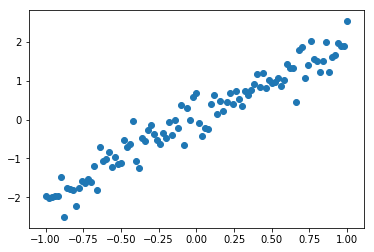

In [6]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33
plt.scatter(x_train, y_train)

Define os nodes de Input e outPut do valor que será injetado pelo X_train e o y_train


In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Define o modelo como  y = w'*x


In [0]:
def model(X, w):
    return tf.multiply(X, w)

Define a variavel weights variable

In [13]:
w = tf.Variable(0.0, name="weights")

<bound method RefVariable.value of <tf.Variable 'weights_4:0' shape=() dtype=float32_ref>>


Define a Cost Function e a mean squared erro



In [0]:
y_model = model(X, w)
cost = tf.reduce_mean(tf.square(Y-y_model))


Define a operacao que sera chamada em cada interacao no algoritmo de aprendizado


In [0]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Inicia todas as variaveis


In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Treinamento em cada  (x, y) pair multiplas vezes


In [0]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

Buscar o valor do parâmetro de learned


In [0]:
w_val = sess.run(w)
sess.close()

Visualiza a best fit curve

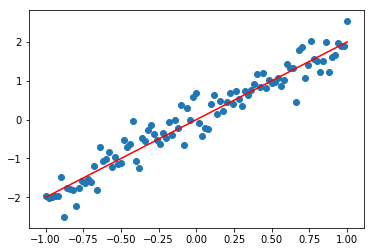

In [21]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()